In [1]:
!python --version

Python 3.7.11


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# statistical libraries
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from scipy.stats import chi2

In [4]:
# Machine Learning libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report


In [5]:
#read data and show first few rows
df1 = pd.read_csv("/content/BankChurners.csv")
df1.head(15)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [6]:
#dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
#check missing values
df1.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
#check the unique values in categorical columns
pd.unique(df1['Attrition_Flag'])

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [9]:
pd.unique(df1['Gender'])

array(['M', 'F'], dtype=object)

In [10]:
pd.unique(df1['Education_Level'])

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [11]:
pd.unique(df1['Card_Category'])

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [12]:
pd.unique(df1['Marital_Status'])

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [13]:
pd.unique(df1['Income_Category'])

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [14]:
#how many unknown values are there
df1['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [15]:
df1['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [16]:
df1['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [17]:
df2= df1.copy()

In [18]:
#Function to remove unknown categories
def remove_unknown(df):
    for column in df.columns:
        df = df[df[column]!= 'Unknown']
    return df

In [19]:
new_df= remove_unknown(df2)
new_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [20]:
#check if unknown categories are removed
pd.unique(new_df['Income_Category'])

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

In [21]:
pd.unique(new_df['Marital_Status'])

array(['Married', 'Single', 'Divorced'], dtype=object)

In [22]:
pd.unique(new_df['Education_Level'])

array(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [23]:
#check duplicates
duplicate = new_df[new_df.duplicated()]
  
print("Duplicate Rows :", duplicate)



Duplicate Rows : Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []


In [24]:
#convert Clientnum to string
new_df['CLIENTNUM'] = new_df['CLIENTNUM'].astype(str)

In [25]:
#export cleaned data
new_df.to_csv("bank.csv")

####**EDA**

#####Proportion of categorical variables

In [26]:
new_df.Attrition_Flag.value_counts(normalize=True)*100

Existing Customer    84.281881
Attrited Customer    15.718119
Name: Attrition_Flag, dtype: float64

In [27]:
new_df.Gender.value_counts(normalize=True)*100

M    52.337241
F    47.662759
Name: Gender, dtype: float64

In [28]:
new_df.Marital_Status.value_counts(normalize=True)*100

Married     50.331874
Single      41.632538
Divorced     8.035588
Name: Marital_Status, dtype: float64

In [29]:
new_df.Education_Level.value_counts(normalize=True)*100

Graduate         36.590877
High School      23.344160
Uneducated       17.003248
College          11.919220
Post-Graduate     6.086711
Doctorate         5.055783
Name: Education_Level, dtype: float64

In [30]:
new_df.Income_Category.value_counts(normalize=True)*100

Less than $40K    39.429459
$40K - $60K       19.940686
$80K - $120K      16.975004
$60K - $80K       15.576896
$120K +            8.077955
Name: Income_Category, dtype: float64

In [31]:
new_df.Card_Category.value_counts(normalize=True)*100

Blue        93.178930
Silver       5.521819
Gold         1.143906
Platinum     0.155345
Name: Card_Category, dtype: float64

In [32]:
#Descriptive statistics of numerical variables
new_df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,46.347691,2.337805,35.981359,3.819376,2.342607,2.454456,8492.773831,1167.501624,7325.272207,0.760584,4394.299816,64.503319,0.711508,0.282313
std,8.041225,1.291649,8.002609,1.544444,0.995104,1.104917,9126.072520,812.315606,9131.217585,0.223139,3468.461606,23.809330,0.238693,0.278731
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2498.000000,463.000000,1248.000000,0.629000,2089.000000,44.000000,0.583000,0.026000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4287.000000,1282.000000,3250.000000,0.735000,3831.000000,67.000000,0.700000,0.186000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10729.000000,1781.000000,9491.000000,0.858000,4740.000000,80.000000,0.818000,0.515000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,134.000000,3.714000,0.999000


In [33]:
#avg credit limit by card category
new_df.groupby('Card_Category')['Credit_Limit'].mean()

Card_Category
Blue         7267.726963
Gold        27940.864198
Platinum    28504.909091
Silver      24573.158568
Name: Credit_Limit, dtype: float64

In [34]:
#avg credit limit by gender
new_df.groupby('Gender')['Credit_Limit'].mean()

Gender
F     3936.542163
M    12642.067377
Name: Credit_Limit, dtype: float64

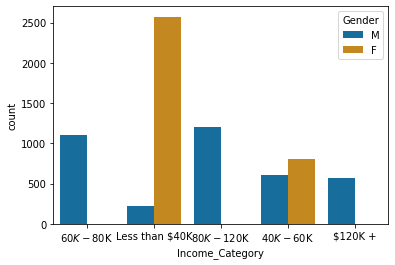

In [35]:
#Gender distribution in income categories
sns.countplot(x="Income_Category", 
              hue="Gender",
              data=new_df, 
              palette="colorblind")

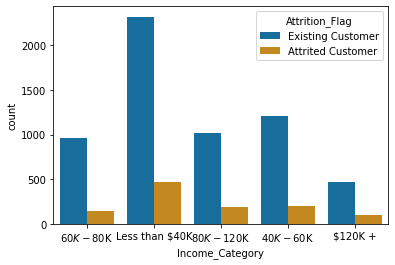

In [36]:
#Attrition by income categories
sns.countplot(x="Income_Category", 
              hue="Attrition_Flag",
              data=new_df, 
              palette="colorblind")

####Hypothesis Testing

H0 = there is no difference in attrition between men and women  
H1= There is difference

In [37]:
new_df_chitest = pd.DataFrame(pd.crosstab(index=new_df['Attrition_Flag'],columns=new_df['Gender']))
print(new_df_chitest)

Gender                F     M
Attrition_Flag               
Attrited Customer   576   537
Existing Customer  2799  3169


In [38]:
arr = new_df_chitest.to_numpy()
arr = np.concatenate((arr, (arr.sum(axis=1)[0]/arr.sum() * arr.sum(axis=0)).reshape(1,-1)))
arr = np.concatenate((arr, (arr.sum(axis=1)[1]/arr.sum() * arr.sum(axis=0)).reshape(1,-1)))
print('arr:',arr)

arr: [[ 576.         537.       ]
 [2799.        3169.       ]
 [ 530.4865132  582.5134868]
 [2844.5134868 3123.4865132]]


In [39]:
chi_sq_statistic = np.sum((arr[2] - arr[0])**2/arr[2]) + np.sum((arr[3] - arr[1])**2/arr[3])
print(chi_sq_statistic)
p_value = 1-chi2.cdf(chi_sq_statistic, df =1*1)#df=Degree of Freedom
print(p_value)

8.852395903119127
0.002927044191352479


In [40]:
if p_value < 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


In [41]:
#check correlation between numerical variables (without the categorical variables)
corr_pearson = new_df.corr('pearson')
corr_pearson.style.background_gradient(cmap='coolwarm')

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.128232,0.791271,-0.022067,0.057870,-0.023971,0.024563,0.016325,0.023097,-0.068976,-0.045859,-0.069883,-0.017599,0.001296
Dependent_count,-0.128232,1.000000,-0.112368,-0.043257,-0.022804,-0.055625,0.081379,-0.003832,0.081674,-0.033320,0.023236,0.057056,0.019081,-0.042485
Months_on_book,0.791271,-0.112368,1.000000,-0.016751,0.071305,-0.011054,0.020103,0.007884,0.019391,-0.059865,-0.037625,-0.050445,-0.028528,-0.010007
Total_Relationship_Count,-0.022067,-0.043257,-0.016751,1.000000,0.005072,0.070539,-0.074876,0.014313,-0.076107,0.053147,-0.348024,-0.246749,0.036900,0.069073
Months_Inactive_12_mon,0.057870,-0.022804,0.071305,0.005072,1.000000,0.026269,-0.015728,-0.039889,-0.012170,-0.028157,-0.039977,-0.048169,-0.039581,-0.003179
Contacts_Count_12_mon,-0.023971,-0.055625,-0.011054,0.070539,0.026269,1.000000,0.016737,-0.048690,0.021059,-0.027849,-0.121018,-0.155612,-0.099544,-0.043495
Credit_Limit,0.024563,0.081379,0.020103,-0.074876,-0.015728,0.016737,1.000000,0.038170,0.996041,0.001973,0.171591,0.080834,-0.005991,-0.483649
Total_Revolving_Bal,0.016325,-0.003832,0.007884,0.014313,-0.039889,-0.048690,0.038170,1.000000,-0.050812,0.061685,0.063782,0.052091,0.083746,0.626391
Avg_Open_To_Buy,0.023097,0.081674,0.019391,-0.076107,-0.012170,0.021059,0.996041,-0.050812,1.000000,-0.003516,0.165821,0.076154,-0.013438,-0.539100
Total_Amt_Chng_Q4_Q1,-0.068976,-0.033320,-0.059865,0.053147,-0.028157,-0.027849,0.001973,0.061685,-0.003516,1.000000,0.027295,-0.004579,0.390099,0.038991


We can see that there is strong positive correlation between credit limit and average open to buy; customer age and months on book (period of relationship with bank); moderate positive correlation between total revolving balance and average utilization ratio; strong positive correlation between total transaction amount and total transaction count; moderate negative correlation between avg open to buy and avg utilization ratio; moderate negative correlation between credit limit and avg utilization ratio.

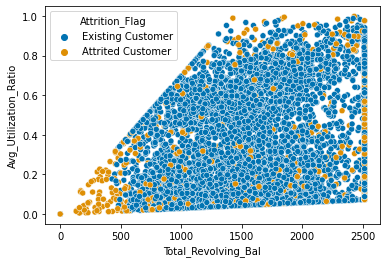

In [42]:
#scatter plot
sns.scatterplot(x="Total_Revolving_Bal", y="Avg_Utilization_Ratio",
hue="Attrition_Flag", data=new_df, palette="colorblind")

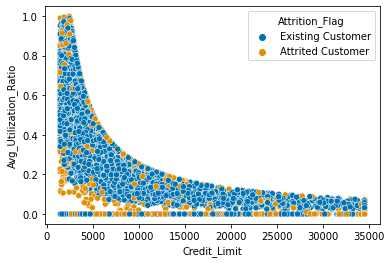

In [43]:
sns.scatterplot(x="Credit_Limit", y="Avg_Utilization_Ratio",
hue="Attrition_Flag", data=new_df, palette="colorblind")

In [44]:
#convert categorical variable to numerical
new_df['Marital_Status'] =new_df['Marital_Status'].astype('category').cat.codes
new_df['Gender'] =new_df['Gender'].astype('category').cat.codes
new_df['Income_Category'] =new_df['Income_Category'].astype('category').cat.codes
new_df['Card_Category'] =new_df['Card_Category'].astype('category').cat.codes
new_df['Education_Level'] =new_df['Education_Level'].astype('category').cat.codes
new_df['Attrition_Flag'] =new_df['Attrition_Flag'].astype('category').cat.codes

In [45]:
#check the data type of all variables
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 7081 non-null   object 
 1   Attrition_Flag            7081 non-null   int8   
 2   Customer_Age              7081 non-null   int64  
 3   Gender                    7081 non-null   int8   
 4   Dependent_count           7081 non-null   int64  
 5   Education_Level           7081 non-null   int8   
 6   Marital_Status            7081 non-null   int8   
 7   Income_Category           7081 non-null   int8   
 8   Card_Category             7081 non-null   int8   
 9   Months_on_book            7081 non-null   int64  
 10  Total_Relationship_Count  7081 non-null   int64  
 11  Months_Inactive_12_mon    7081 non-null   int64  
 12  Contacts_Count_12_mon     7081 non-null   int64  
 13  Credit_Limit              7081 non-null   float64
 14  Total_R

[Text(0.5, 0, 'Attrition_Flag'),
 Text(1.5, 0, 'Customer_Age'),
 Text(2.5, 0, 'Gender'),
 Text(3.5, 0, 'Dependent_count'),
 Text(4.5, 0, 'Education_Level'),
 Text(5.5, 0, 'Marital_Status'),
 Text(6.5, 0, 'Income_Category'),
 Text(7.5, 0, 'Card_Category'),
 Text(8.5, 0, 'Months_on_book'),
 Text(9.5, 0, 'Total_Relationship_Count'),
 Text(10.5, 0, 'Months_Inactive_12_mon'),
 Text(11.5, 0, 'Contacts_Count_12_mon'),
 Text(12.5, 0, 'Credit_Limit'),
 Text(13.5, 0, 'Total_Revolving_Bal'),
 Text(14.5, 0, 'Avg_Open_To_Buy'),
 Text(15.5, 0, 'Total_Amt_Chng_Q4_Q1'),
 Text(16.5, 0, 'Total_Trans_Amt'),
 Text(17.5, 0, 'Total_Trans_Ct'),
 Text(18.5, 0, 'Total_Ct_Chng_Q4_Q1'),
 Text(19.5, 0, 'Avg_Utilization_Ratio')]

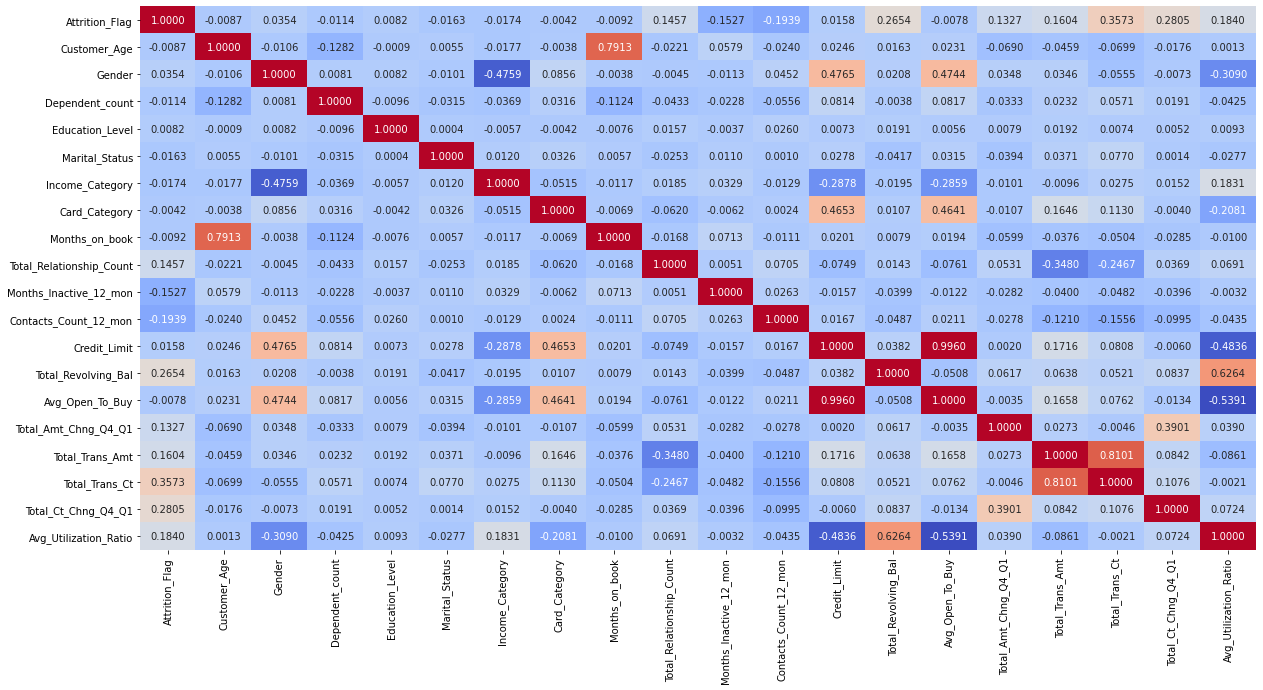

In [46]:
#check correlation again (with converted categorical variables)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(new_df.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")

In [47]:
#sorted correlation with target variable
corr_pearson = new_df.corr(method='pearson')
print(corr_pearson["Attrition_Flag"].sort_values(ascending=False))

Attrition_Flag              1.000000
Total_Trans_Ct              0.357261
Total_Ct_Chng_Q4_Q1         0.280460
Total_Revolving_Bal         0.265380
Avg_Utilization_Ratio       0.183984
Total_Trans_Amt             0.160378
Total_Relationship_Count    0.145713
Total_Amt_Chng_Q4_Q1        0.132702
Gender                      0.035358
Credit_Limit                0.015815
Education_Level             0.008224
Card_Category              -0.004156
Avg_Open_To_Buy            -0.007802
Customer_Age               -0.008735
Months_on_book             -0.009249
Dependent_count            -0.011423
Marital_Status             -0.016325
Income_Category            -0.017429
Months_Inactive_12_mon     -0.152732
Contacts_Count_12_mon      -0.193923
Name: Attrition_Flag, dtype: float64


####**Set label and split data**

In [48]:
#Label the target/dependant variable
Attrition = np.array(new_df['Attrition_Flag'])

In [50]:
#drop columns ["Clientnum" is client ID, not a feature]
new_df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1, inplace=True)

In [51]:
#split data
train_x, test_x, train_y, test_y = train_test_split(new_df, Attrition, test_size = 0.20, random_state = 42)

print('Training instances Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing instances Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training instances Shape: (5664, 19)
Training Labels Shape: (5664,)
Testing instances Shape: (1417, 19)
Testing Labels Shape: (1417,)


####Feature selection 


In [52]:
#Mutual Information Gain
MI = mutual_info_classif(new_df,Attrition, random_state = 1)
pd.Series(MI,new_df.columns).sort_values(ascending=False)

Total_Trans_Amt             0.147599
Total_Trans_Ct              0.113143
Total_Ct_Chng_Q4_Q1         0.091897
Total_Revolving_Bal         0.087326
Avg_Utilization_Ratio       0.055180
Total_Amt_Chng_Q4_Q1        0.033747
Months_Inactive_12_mon      0.024807
Contacts_Count_12_mon       0.023691
Avg_Open_To_Buy             0.015187
Total_Relationship_Count    0.010342
Credit_Limit                0.008104
Dependent_count             0.006179
Card_Category               0.003538
Marital_Status              0.001152
Customer_Age                0.000252
Income_Category             0.000030
Months_on_book              0.000000
Education_Level             0.000000
Gender                      0.000000
dtype: float64

In [53]:
#Function to select top features/predictors based on Mutual info gain 
def select_features(train_x, train_y, no_features):
    """ this function return top features based on Mutual information gain """
    mi_score = mutual_info_classif(train_x, train_y, random_state = 1)
    mi_sorted=pd.Series(mi_score,train_x.columns).sort_values(ascending=False).nlargest(n=no_features)
    return mi_sorted.index,mi_sorted

In [54]:
#function to create data with selected features only
def data_on_selected_features(x, features_index):
    return x[features_index]

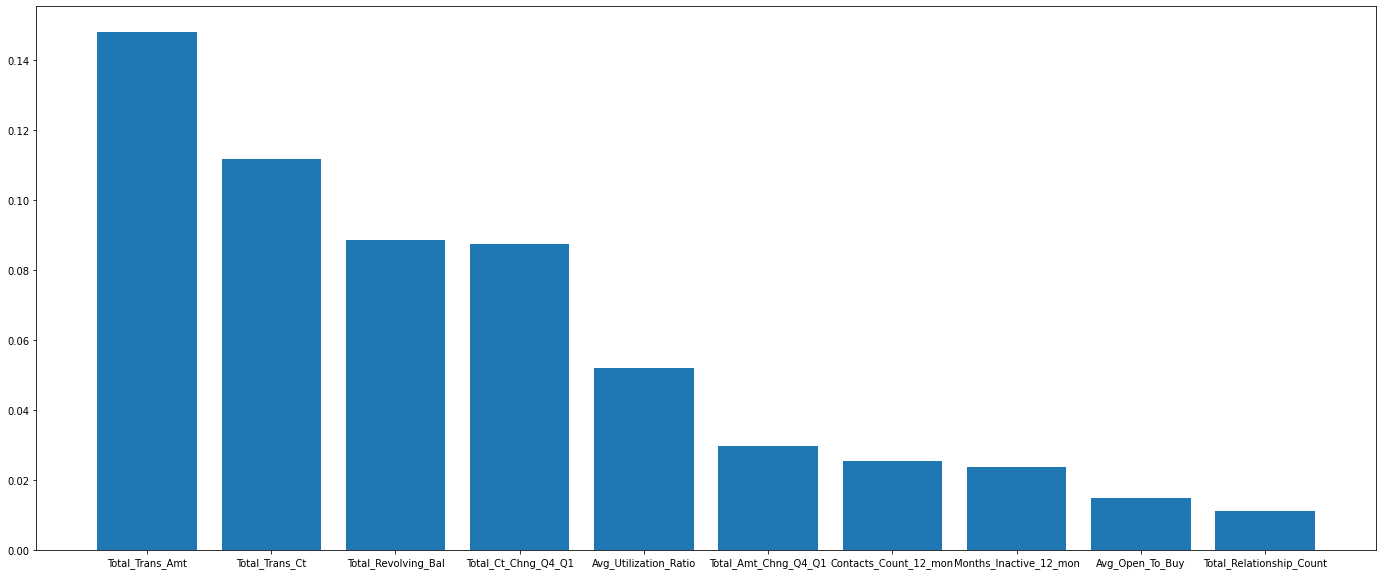

In [55]:
features_index, mi_info = select_features(train_x, train_y, 10)
plt.figure(figsize=(24,10))
plt.bar([i for i in range(len(features_index))], mi_info, tick_label=features_index)
plt.show()

In [56]:
#Data with selected features
fs_train_x=data_on_selected_features(train_x,features_index)
fs_test_x=data_on_selected_features(test_x,features_index)

####Feature scaling


In [57]:
#we have standardized data as the variables were not on the same scales and not all had normal distribution
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

In [58]:
# copy of datasets with selected features
x_train_stand = fs_train_x.copy()
x_test_stand = fs_test_x.copy()

In [59]:
# numerical features
features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Avg_Open_To_Buy', 'Total_Relationship_Count']

In [60]:
# apply standardization on numerical features
for i in features:
    
    # fit on training data column
    scale = StandardScaler().fit(x_train_stand[[i]])
    
    # transform the training data column
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    
    # transform the testing data column
    x_test_stand[i] = scale.transform(x_test_stand[[i]])

In [61]:
#check scaled data
x_train_stand

,Total_Trans_Amt,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Contacts_Count_12_mon,Months_Inactive_12_mon,Avg_Open_To_Buy,Total_Relationship_Count
4698,0.005920,0.098960,-1.426025,0.427780,-1.015338,0.785582,0.495327,0.658519,-0.607865,0.112359
5660,-0.670818,-0.110639,-1.031293,-0.676694,-0.925643,-0.003568,0.495327,0.658519,0.587104,-0.534390
8714,0.805885,0.895440,0.584526,-0.617450,-0.846712,0.032303,-1.310616,-0.348461,2.820147,-1.181138
693,-0.742054,-0.026799,1.669117,-0.786718,2.486346,0.606230,-0.407644,0.658519,-0.790834,0.759107
7826,0.197797,0.769680,-0.822244,-0.067329,0.208099,-0.138082,-0.407644,-1.355441,-0.693320,-1.181138
...,...,...,...,...,...,...,...,...,...,...
5242,-0.059858,0.979279,-1.426025,-0.211207,-1.015338,0.754196,1.398298,0.658519,-0.639298,0.759107
7365,0.184584,1.021199,0.696429,0.296597,1.270085,-0.281564,-1.310616,0.658519,-0.689392,-0.534390
7413,-0.631754,-0.990958,-1.426025,-0.807876,-1.015338,-0.120147,-0.407644,0.658519,-0.542621,0.112359
7681,0.106454,0.769680,1.196914,-0.067329,1.503291,-0.321918,-0.407644,0.658519,-0.697974,0.759107


In [62]:
x_test_stand

,Total_Trans_Amt,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Amt_Chng_Q4_Q1,Contacts_Count_12_mon,Months_Inactive_12_mon,Avg_Open_To_Buy,Total_Relationship_Count
9866,3.048371,1.440399,0.347195,-0.135036,-0.333658,-0.034955,-0.407644,-0.348461,-0.120679,0.112359
9239,3.038318,1.272719,0.697658,0.804401,-0.376711,0.534489,0.495327,-0.348461,0.077694,-1.181138
963,-0.831099,-1.284398,1.573201,-0.041939,0.900542,-0.303983,0.495327,-1.355441,-0.563085,0.759107
1999,-0.941973,-1.619758,0.329980,-1.996984,2.536575,-1.187293,0.495327,-0.348461,-0.796005,-0.534390
2531,-0.781406,-1.577838,0.990326,-0.092719,2.048635,-0.738912,-0.407644,-0.348461,-0.760688,1.405856
...,...,...,...,...,...,...,...,...,...,...
7556,0.089794,0.895440,-0.032780,-0.101183,0.190160,-0.173953,-0.407644,0.658519,-0.551422,-0.534390
8465,0.161605,0.224720,-0.400459,0.558962,1.065581,-0.564044,-0.407644,-0.348461,-0.731058,-1.827887
9705,3.335899,1.985358,1.669117,0.055390,1.183978,0.081624,-1.310616,-0.348461,-0.622608,-0.534390
5115,-0.611934,-0.781359,-1.426025,-0.524353,-1.015338,-0.317434,2.301270,-0.348461,-0.626349,-0.534390


##ML models for classification

In [63]:
#logistic regression classification
clf = LogisticRegression(solver='lbfgs')
model = clf.fit(x_train_stand,train_y)
test_predictions = model.predict(x_test_stand)
print(classification_report(test_y, test_predictions))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63       212
           1       0.92      0.97      0.94      1205

    accuracy                           0.90      1417
   macro avg       0.83      0.76      0.79      1417
weighted avg       0.90      0.90      0.90      1417



In [64]:
print(clf.coef_)
print(clf.intercept_)
coefficients = pd.concat([pd.DataFrame(fs_train_x.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
print(coefficients)

[[-1.48676016  2.49489764  0.76237918  0.62522802  0.06738063  0.08649065
  -0.47059585 -0.46897833  0.11444052  0.66458473]]
[2.8681108]
                          0         0
0           Total_Trans_Amt -1.486760
1            Total_Trans_Ct  2.494898
2       Total_Revolving_Bal  0.762379
3       Total_Ct_Chng_Q4_Q1  0.625228
4     Avg_Utilization_Ratio  0.067381
5      Total_Amt_Chng_Q4_Q1  0.086491
6     Contacts_Count_12_mon -0.470596
7    Months_Inactive_12_mon -0.468978
8           Avg_Open_To_Buy  0.114441
9  Total_Relationship_Count  0.664585


In [65]:
#DT classification
clf = DecisionTreeClassifier()
model = clf.fit(x_train_stand, train_y)
test_predictions = model.predict(x_test_stand)
print(classification_report(test_y, test_predictions))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       212
           1       0.97      0.95      0.96      1205

    accuracy                           0.93      1417
   macro avg       0.86      0.88      0.87      1417
weighted avg       0.93      0.93      0.93      1417



In [66]:
#RF classification
clf = RandomForestClassifier()
model = clf.fit(x_train_stand, train_y)
test_predictions = model.predict(x_test_stand)
print(classification_report(test_y, test_predictions))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       212
           1       0.97      0.98      0.98      1205

    accuracy                           0.96      1417
   macro avg       0.93      0.91      0.92      1417
weighted avg       0.96      0.96      0.96      1417



In [67]:
#KNN
clf = KNeighborsClassifier(n_neighbors=2)
model = clf.fit(x_train_stand, train_y)
test_predictions = model.predict(x_test_stand)
print(classification_report(test_y, test_predictions))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       212
           1       0.97      0.92      0.94      1205

    accuracy                           0.90      1417
   macro avg       0.80      0.86      0.82      1417
weighted avg       0.91      0.90      0.90      1417



In [68]:
#Neural networks (MLP)
clf = MLPClassifier(solver='lbfgs', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=1000, random_state=42)
model = clf.fit(x_train_stand, train_y)
test_predictions = model.predict(x_test_stand)
print(classification_report(test_y, test_predictions))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       212
           1       0.96      0.95      0.96      1205

    accuracy                           0.93      1417
   macro avg       0.86      0.87      0.86      1417
weighted avg       0.93      0.93      0.93      1417



#####Model comparison

Model  | Accuracy 
--------------------------|------------------
Logistic Regression       | 0.90 
Decision Tree             | 0.93 
Random Forest             | 0.96 
KNN                       | 0.90
Neural Networks(MLP)      | 0.93